In [1]:
from dotenv import load_dotenv
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.documents import Document
from langchain_community.tools import DuckDuckGoSearchRun
from typing import TypedDict, Optional
from operator import itemgetter
import re
import os

In [2]:
class State(TypedDict, total=False):
    topic: str
    author: str
    question: str
    recent_fact_checks: str

In [5]:
## get user input
def get_user_input(state: State):
    topic = "Rich dad poor dad"
    author = "Robert Kiyosaki"
    print(f"Topic: {topic}")
    print(f"Author: {author}")
    return  {"topic": topic, "author": author}

In [6]:
def fact_checks(state: State) -> State:
    try:
        search = DuckDuckGoSearchRun()
        results = search.invoke(f"{state['author']} {state['topic']} fact check")
        state["recent_fact_checks"] = results[:1000] if results else "No additional info found"
        return state
    except Exception as e:
        print(f"Fact check error: {str(e)}")
        state["recent_fact_checks"] = "Error in fact checking"
        return state

In [7]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph,END
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from typing_extensions import TypedDict

In [8]:
# Graph
Graphbuilder = StateGraph(State)
Graphbuilder.add_node("get_user_input", get_user_input)
Graphbuilder.add_node("fact_checks", fact_checks)

Graphbuilder.add_edge(START, "get_user_input")
Graphbuilder.add_edge("get_user_input", "fact_checks")
Graphbuilder.add_edge("fact_checks", END)

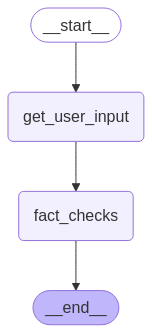

In [9]:

workflow = Graphbuilder.compile()
from IPython.display import Image, display
display(Image(workflow.get_graph().draw_mermaid_png()))

In [12]:

state = workflow.invoke(get_user_input({}))
print("Final State: ", state) 

Topic: Rich dad poor dad
Author: Robert Kiyosaki
Topic: Rich dad poor dad
Author: Robert Kiyosaki
Final State:  {'topic': 'Rich dad poor dad', 'author': 'Robert Kiyosaki', 'recent_fact_checks': 'In his popular book "Rich Dad Poor Dad," author Robert Kiyosaki, along with co-writer Sharon L. Lecther, offers a tale of two fathers: One man, a successful businessman, uses his financial savvy to generate lasting wealth; the other, a hard-working educator, struggles to go beyond living within his means. Though both men are admirable in their love of family, only the rich dad has the ... Robert Kiyosaki is a businessman, motivational speaker, and author of "Rich Dad Poor Dad" who is also known for his controversial predictions. He encourages people to build wealth through assets and builds his brand around financial education. Robert Kiyosaki, author of the classic "Rich Dad Poor Dad," cited how an economic collapse is just around the corner. Rich Dad Poor Dad For Teens (2004) "A genius is som